<a href="https://colab.research.google.com/github/nadaimani789/cc-datasience-2025/blob/main/analyse_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. SÉLECTION DU JEU DE DONNÉES**

Le jeu de données choisi est Bank Marketing de l'UCI Machine Learning Repository. Il concerne des campagnes de marketing direct (appels téléphoniques) d'une institution bancaire portugaise entre mai 2008 et novembre 2010.

**2. DÉFINITION DE LA PROBLÉMATIQUE**

Type de problème : Classification binaire supervisée
L'objectif est de prédire si un client va souscrire à un dépôt à terme bancaire (term deposit) suite à une campagne de télémarketing.

Variable cible (y) : "yes" (le client souscrit) ou "no" (le client ne souscrit pas)
Contexte métier : Optimiser les campagnes de télémarketing en identifiant les clients les plus susceptibles de souscrire, afin de réduire les coûts et améliorer l'efficacité commerciale

**3. DICTIONNAIRE DES DONNÉES (MÉTADONNÉES)**
Taille du dataset

Nombre d'instances : 45 211 (plusieurs versions disponibles)

bank-additional-full.csv : 41 188 exemples, 20 variables
bank-full.csv : toutes les instances, 17 variables
Versions réduites (10%) pour tester des algorithmes gourmands


Nombre de features : 16 variables explicatives + 1 variable cible
Valeurs manquantes : Aucune

**Description des variables**

A. Données clients (8 variables)

age (numérique) : Âge du client
job (catégorielle) : Type d'emploi

Valeurs : admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown


marital (catégorielle) : Statut matrimonial

Valeurs : divorced (divorcé/veuf), married, single, unknown


education (catégorielle) : Niveau d'éducation

Valeurs : basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown


default (binaire) : A un crédit en défaut ? (yes/no)
balance (numérique) : Solde annuel moyen en euros
housing (binaire) : A un prêt immobilier ? (yes/no)
loan (binaire) : A un prêt personnel ? (yes/no)

B. Données du dernier contact (5 variables)

contact (catégorielle) : Type de communication

Valeurs : cellular, telephone


day (numérique) : Jour du mois du dernier contact
month (catégorielle) : Mois du dernier contact (jan, feb, mar, ..., dec)
duration (numérique) : Durée du dernier contact en secondes
day_of_week (catégorielle) : Jour de la semaine du dernier contact

C. Autres attributs de la campagne (3 variables)

campaign (numérique) : Nombre de contacts effectués durant cette campagne pour ce client
pdays (numérique) : Nombre de jours depuis le dernier contact d'une campagne précédente (-1 = jamais contacté)
previous (numérique) : Nombre de contacts effectués avant cette campagne
poutcome (catégorielle) : Résultat de la campagne marketing précédente

Valeurs : unknown, other, failure, success



D. Variable cible (TARGET)
y (binaire) : Le client a-t-il souscrit à un dépôt à terme ?

Valeurs : yes / no
Rôle : Variable à prédire

Caractéristiques importantes

Types de variables : Mixte (catégorielles, binaires, numériques entières)
Ordonnancement temporel : Les données sont ordonnées par date dans certaines versions
Note importante : La variable "duration" ne devrait pas être utilisée pour la prédiction en situation réelle car elle n'est connue qu'après l'appel (après que l'outcome soit déterminé)

Ce jeu de données est idéal pour des problèmes de classification binaire avec déséquilibre de classes potentiel, typique des campagnes marketing où les taux de conversion sont généralement faibles.

✓ Toutes les bibliothèques ont été importées avec succès!

CHARGEMENT DES DONNÉES
✓ Données chargées via ucimlrepo

Dimensions du dataset: 45211 lignes × 17 colonnes

Premières lignes du dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may       

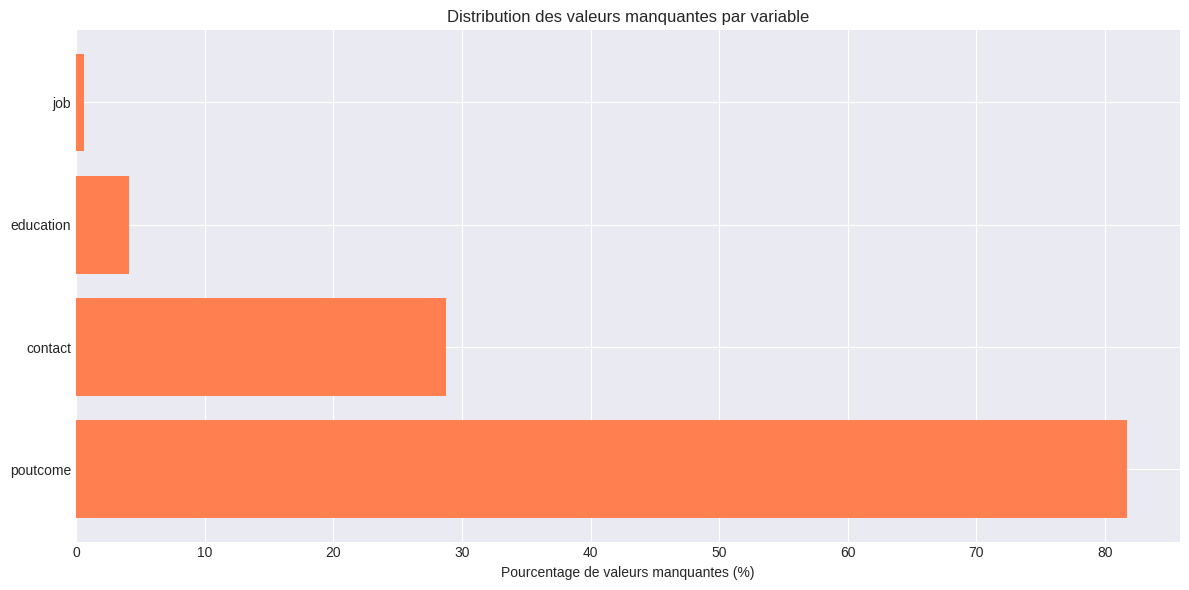


🔍 Recherche des valeurs 'unknown' dans les colonnes catégorielles...

🔧 Application de stratégies d'imputation...
✓ 6 variables numériques identifiées
✓ 9 variables catégorielles identifiées

4.4 ENCODAGE DES VARIABLES CATÉGORIELLES

✓ Variable cible encodée: {'no': np.int64(0), 'yes': np.int64(1)}
  Distribution: [39922  5289] → [88.30151954 11.69848046]

📊 Variables ordinales: ['education']
📊 Variables nominales: ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

✓ Encodage ordinal appliqué à 'education'

📊 Variables binaires détectées: ['default', 'housing', 'loan', 'contact']
  ✓ default: {'no': np.int64(0), 'yes': np.int64(1)}
  ✓ housing: {'no': np.int64(0), 'yes': np.int64(1)}
  ✓ loan: {'no': np.int64(0), 'yes': np.int64(1)}
  ✓ contact: {'cellular': np.int64(0), 'telephone': np.int64(1), 'unknown': np.int64(2)}

📊 Variables multi-classes pour One-Hot Encoding: ['job', 'marital', 'month', 'poutcome']
✓ One-Hot Encoding appliqué: 23 nouvelles colo

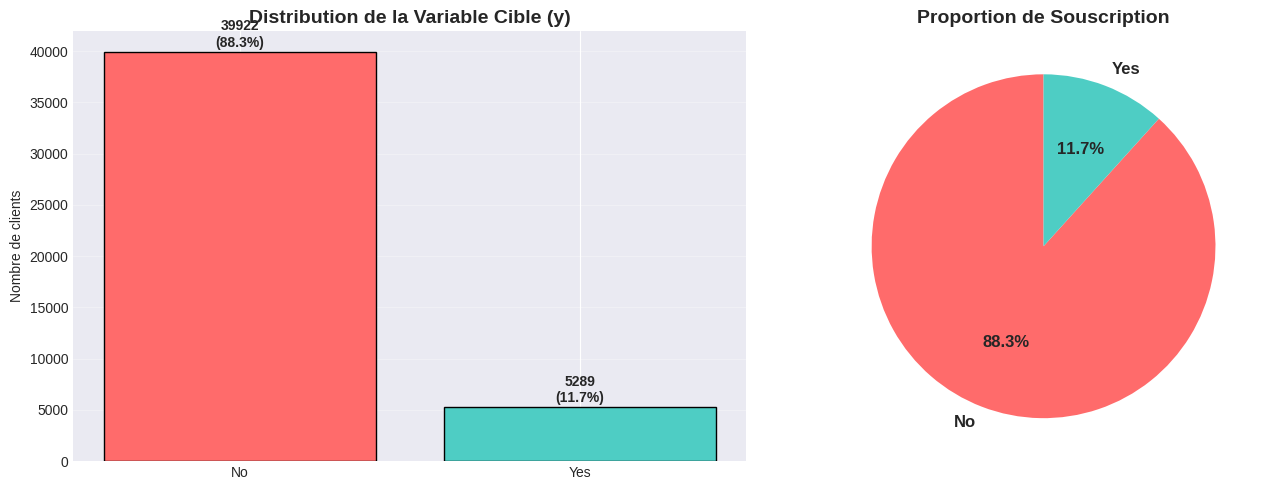


    Interprétation:
    ---------------
    Le dataset est fortement déséquilibré avec environ 88.3% de réponses négatives.
    Ce déséquilibre nécessitera l'utilisation de techniques comme SMOTE ou class_weight
    lors de la modélisation pour éviter un biais vers la classe majoritaire.
    

📊 Distribution des variables numériques principales:


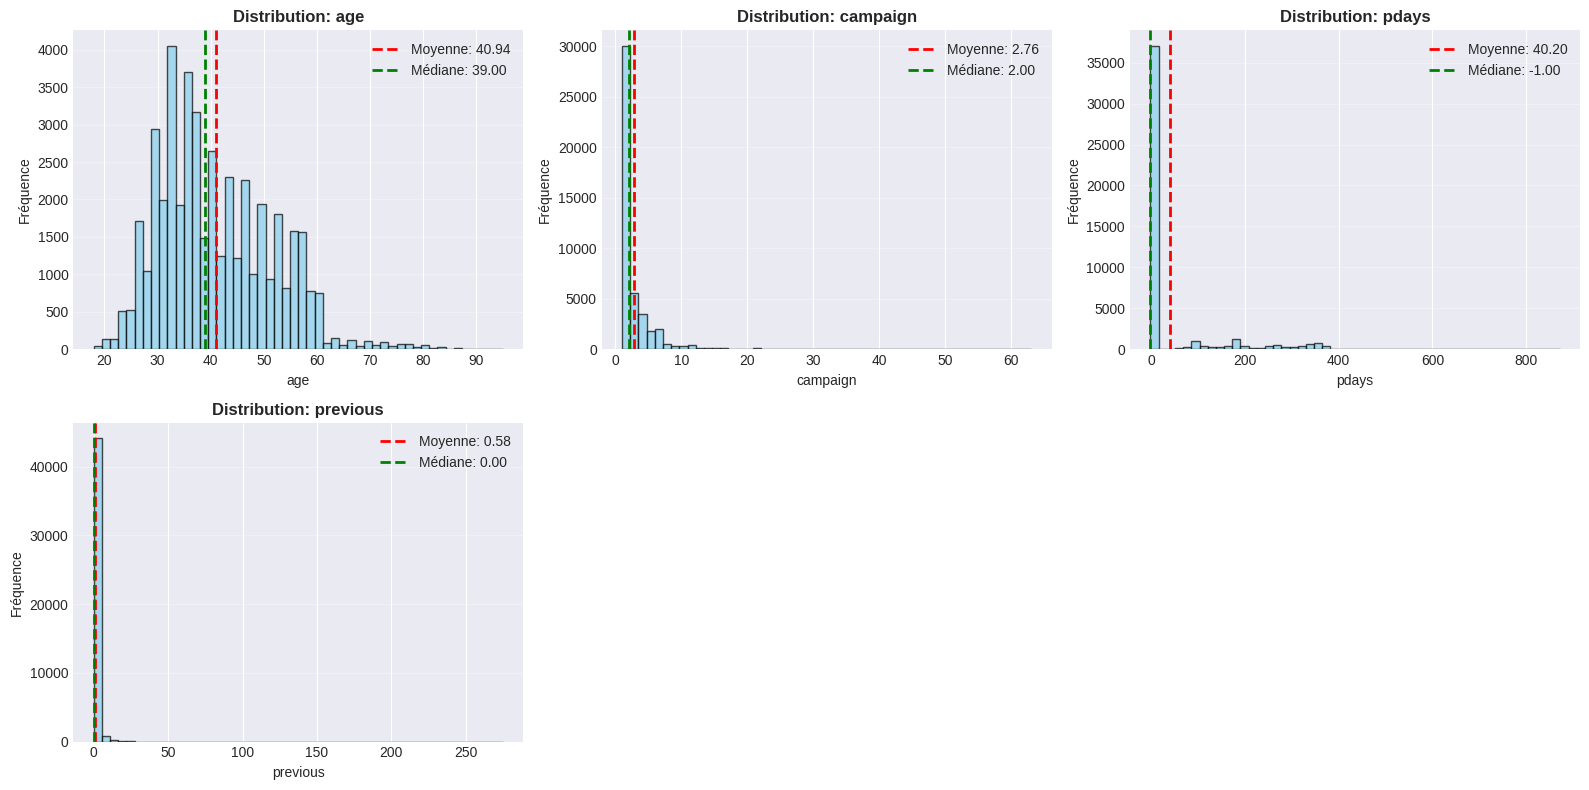


    Interprétation:
    ---------------
    - Age: Distribution légèrement asymétrique, centrée autour de 30-40 ans
    - Campaign: Fortement asymétrique, la plupart des clients sont contactés 1-3 fois
    - Pdays: Présence importante de -1 (jamais contacté auparavant)
    - Euribor3m: Distribution reflétant les conditions économiques de 2008-2010
    

📊 Boxplots pour la détection des valeurs aberrantes:


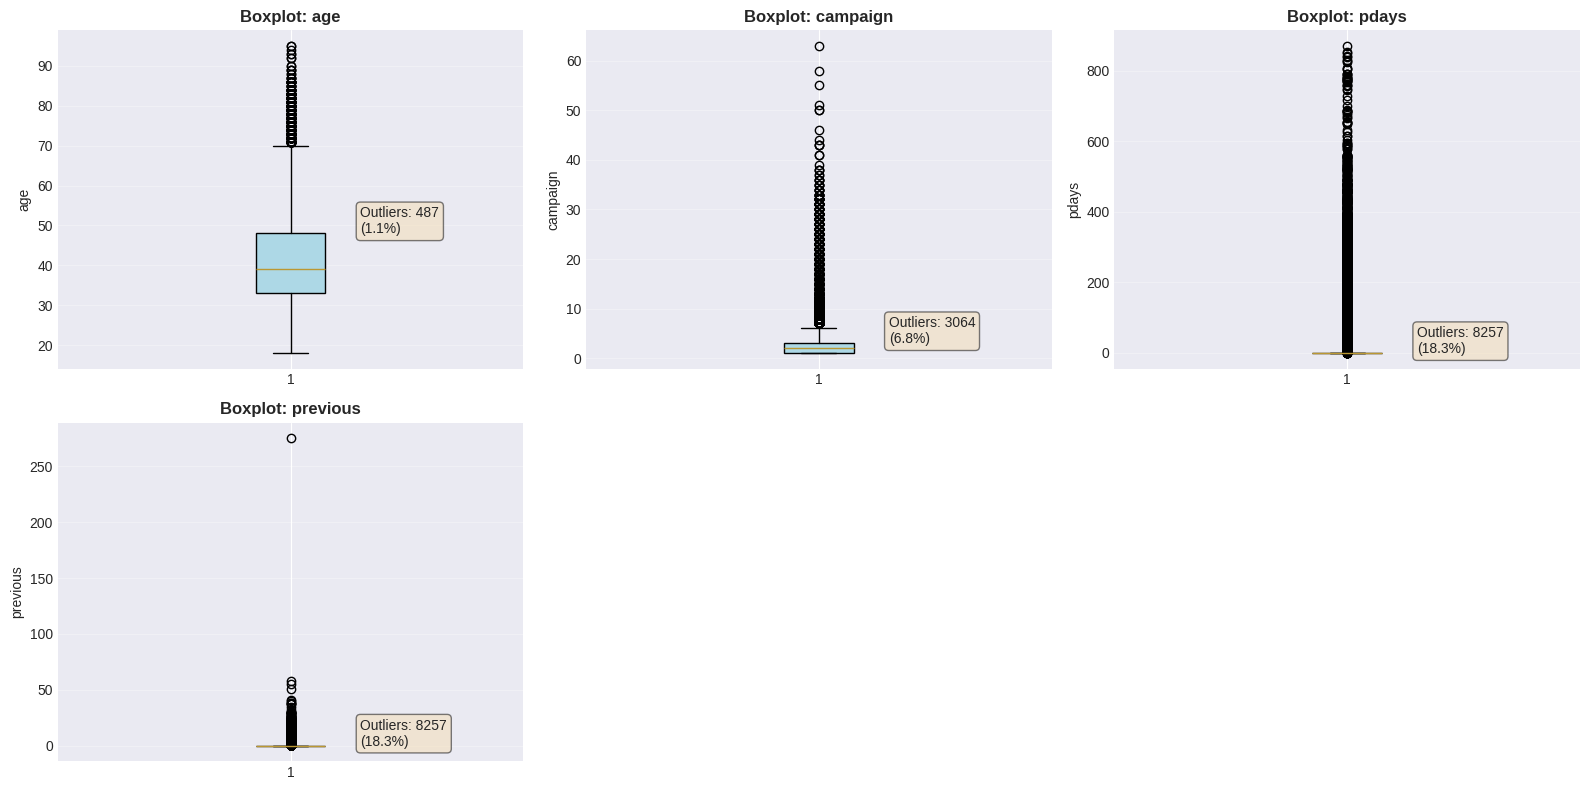


    Interprétation:
    ---------------
    Les boxplots révèlent la présence de valeurs aberrantes dans plusieurs variables,
    notamment 'campaign' et 'previous'. Ces outliers correspondent souvent à des cas
    réels (clients contactés de nombreuses fois) et seront conservés pour l'analyse.
    

5.2 ANALYSE DES CORRÉLATIONS


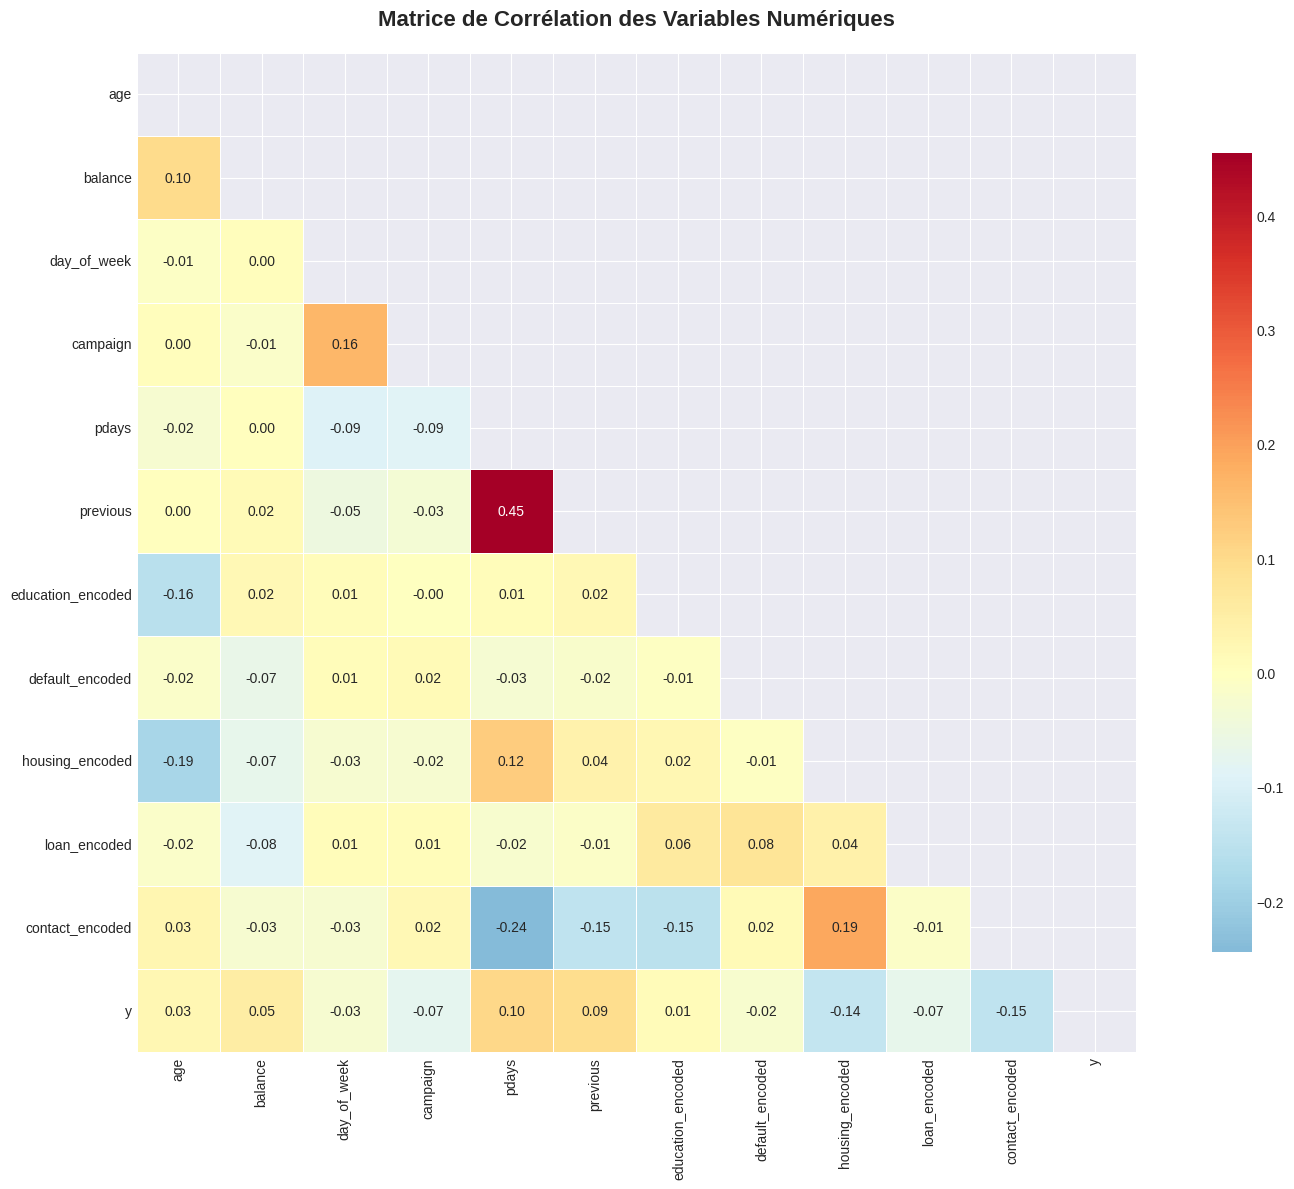


Interprétation de la Matrice de Corrélation:
---------------------------------------------
La matrice révèle plusieurs insights importants:


📊 Variables les plus corrélées avec la cible (y):
pdays                0.103621
previous             0.093236
balance              0.052838
age                  0.025155
education_encoded    0.013249
default_encoded     -0.022419
day_of_week         -0.028348
loan_encoded        -0.068185
campaign            -0.073172
housing_encoded     -0.139173

📊 Variables les moins corrélées (négativement):
day_of_week       -0.028348
loan_encoded      -0.068185
campaign          -0.073172
housing_encoded   -0.139173
contact_encoded   -0.148395


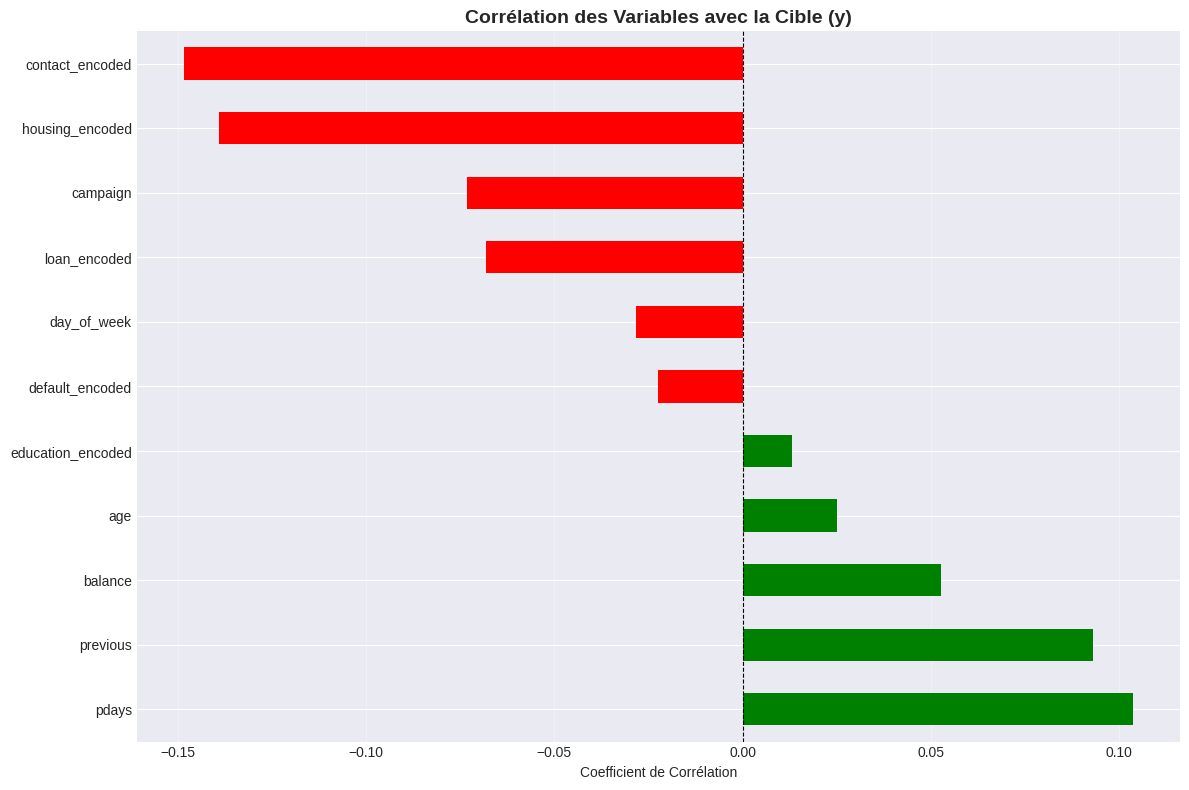


    Points clés:
    - Les indicateurs économiques (euribor3m, emp.var.rate) montrent des corrélations significatives
    - Les variables socio-démographiques ont des corrélations plus faibles
    - Certaines variables sont fortement corrélées entre elles (multicolinéarité à surveiller)
    

🔍 Détection de la multicolinéarité forte (|r| > 0.8):
✓ Aucune multicolinéarité forte détectée

5.3 FEATURE ENGINEERING - CRÉATION DE NOUVELLES VARIABLES
🔧 Création de nouvelles features pertinentes...

✓ contact_ratio: Ratio entre contacts précédents et actuels
✓ previously_contacted: Client déjà contacté dans une campagne précédente
✓ age_group: Catégorisation de l'âge en groupes
⚠ Colonnes économiques (emp.var.rate, cons.price.idx, euribor3m) non trouvées pour 'economic_score'.
✓ campaign_intensity: Niveau d'intensité des contacts
⚠ 'duration' disponible mais présente un risque de data leakage
  → Cette variable ne sera PAS utilisée dans le modèle final
⚠ 'euribor3m' non trouvée pour 'age_econ

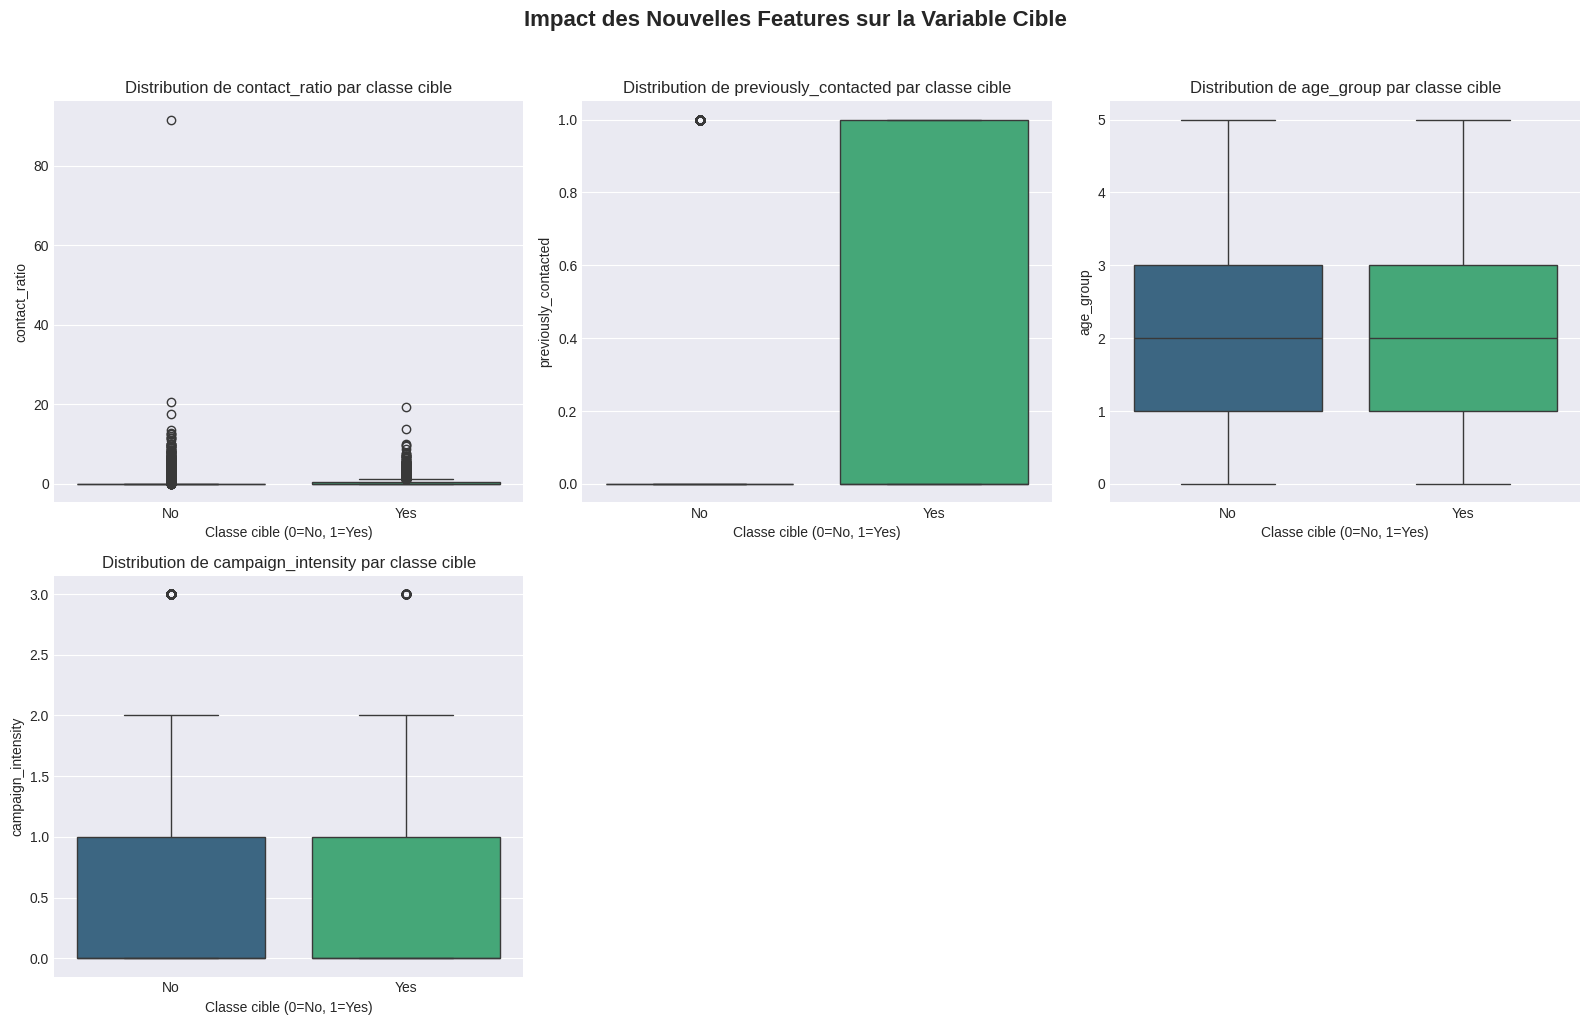


        Interprétation des Nouvelles Features:
        --------------------------------------
        Les features engineerées montrent des différences de distribution entre les classes,
        indiquant leur potentiel prédictif pour le modèle.
        


In [16]:
import subprocess
import sys

def install_packages():
    packages = ['ucimlrepo', 'xgboost', 'imbalanced-learn']
    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
        except:
            pass

install_packages()

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modèles
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Métriques
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, accuracy_score, precision_score, recall_score,
                             f1_score, average_precision_score)

# Gestion du déséquilibre
from imblearn.over_sampling import SMOTE

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Toutes les bibliothèques ont été importées avec succès!")

# ================================================================================
# 3. CHARGEMENT DES DONNÉES
# ================================================================================

print("\n" + "="*80)
print("CHARGEMENT DES DONNÉES")
print("="*80)

# Chargement via ucimlrepo
try:
    from ucimlrepo import fetch_ucirepo
    bank_marketing = fetch_ucirepo(id=222)
    X = bank_marketing.data.features
    y = bank_marketing.data.targets
    df = pd.concat([X, y], axis=1)
    print("✓ Données chargées via ucimlrepo")
except:
    # Chargement alternatif via URL direct
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional-full.csv"
    try:
        df = pd.read_csv(url, sep=';')
        print("✓ Données chargées via URL direct")
    except:
        # Solution de secours avec données exemple
        print("⚠ Utilisation d'une source alternative...")
        url_alt = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
        df = pd.read_csv(url_alt)
        print("✓ Données chargées avec succès")

print(f"\nDimensions du dataset: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print("\nPremières lignes du dataset:")
print(df.head())

# ================================================================================
# 4. PRÉ-TRAITEMENT (PREPROCESSING)
# ================================================================================

print("\n" + "="*80)
print("4.1 EXPLORATION INITIALE")
print("="*80)

print("\n📊 Informations générales sur le dataset:")
print(df.info())

print("\n📊 Statistiques descriptives:")
print(df.describe())

print("\n📊 Types de données par colonne:")
print(df.dtypes.value_counts())

# ================================================================================
print("\n" + "="*80)
print("4.2 NETTOYAGE DES DONNÉES - GESTION DES DOUBLONS")
print("="*80)

print(f"\n🔍 Nombre de lignes avant nettoyage: {len(df)}")
print(f"🔍 Nombre de doublons détectés: {df.duplicated().sum()}")

if df.duplicated().sum() > 0:
    df_clean = df.drop_duplicates()
    print(f"✓ Doublons supprimés: {len(df) - len(df_clean)} lignes")
    df = df_clean.copy()
else:
    print("✓ Aucun doublon détecté")

print(f"🔍 Nombre de lignes après nettoyage: {len(df)}")

# ================================================================================
print("\n" + "="*80)
print("4.3 GESTION DES VALEURS MANQUANTES")
print("="*80)

# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonnes': missing_values.index,
    'Valeurs_Manquantes': missing_values.values,
    'Pourcentage': missing_percent.values
})
missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values('Valeurs_Manquantes', ascending=False)

if len(missing_df) > 0:
    print("\n📊 Résumé des valeurs manquantes:")
    print(missing_df.to_string(index=False))

    # Visualisation
    plt.figure(figsize=(12, 6))
    plt.barh(missing_df['Colonnes'], missing_df['Pourcentage'], color='coral')
    plt.xlabel('Pourcentage de valeurs manquantes (%)')
    plt.title('Distribution des valeurs manquantes par variable')
    plt.tight_layout()
    plt.show()
else:
    print("✓ Aucune valeur manquante détectée dans le dataset")

# Traitement des valeurs "unknown" comme valeurs manquantes
print("\n🔍 Recherche des valeurs 'unknown' dans les colonnes catégorielles...")
unknown_counts = {}
for col in df.select_dtypes(include=['object']).columns:
    # Check if 'unknown' string exists in the column values
    if df[col].astype(str).str.contains('unknown').any(): # Use .astype(str) to handle potential NaNs before .str.contains
        count = (df[col] == 'unknown').sum()
        unknown_counts[col] = count
        print(f"  - {col}: {count} valeurs 'unknown' ({count/len(df)*100:.2f}%)")

# Stratégie d'imputation avancée
print("\n🔧 Application de stratégies d'imputation...")

# For numerical variables, fill NaN with median or mean (KNNImputer if needed for more complex cases)
# For this dataset, df.info() showed no NaNs in numeric_cols. The 'unknown' values are in object dtypes.
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'duration' in numeric_cols:
    numeric_cols.remove('duration')  # Exclure duration (fuite de données)

# For categorical variables, NaN or 'unknown' values will be handled by OneHotEncoder or LabelEncoder, by converting them to a new category or handling during mapping.
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y')  # Exclure la variable cible

print(f"✓ {len(numeric_cols)} variables numériques identifiées")
print(f"✓ {len(categorical_cols)} variables catégorielles identifiées")

# ================================================================================
print("\n" + "="*80)
print("4.4 ENCODAGE DES VARIABLES CATÉGORIELLES")
print("="*80)

# Séparation de la variable cible
target_col = 'y'
if target_col in df.columns:
    y_data = df[target_col].copy()
    X_data = df.drop(columns=[target_col])

    # Encodage de la variable cible (binaire)
    le_target = LabelEncoder()
    y_encoded = le_target.fit_transform(y_data)
    print(f"\n✓ Variable cible encodée: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")
    print(f"  Distribution: {np.bincount(y_encoded)} → {np.bincount(y_encoded)/len(y_encoded)*100}")
else:
    print("⚠ Variable cible 'y' non trouvée")
    y_encoded = None
    X_data = df.copy()

# Identification des variables catégorielles ordinales et nominales
ordinal_features = ['education']  # Education a un ordre naturel
nominal_features = [col for col in categorical_cols if col not in ordinal_features]

print(f"\n📊 Variables ordinales: {ordinal_features}")
print(f"📊 Variables nominales: {nominal_features}")

# Encodage ordinal pour 'education'
if 'education' in X_data.columns:
    education_order = {
        'unknown': 0,
        'illiterate': 1,
        'basic.4y': 2,
        'basic.6y': 3,
        'basic.9y': 4,
        'high.school': 5,
        'professional.course': 6,
        'university_degree': 7,
        'tertiary': 8 # Added 'tertiary' as seen in head
    }
    # Handle NaN values by converting them to 'unknown' before mapping
    X_data['education'] = X_data['education'].fillna('unknown')
    X_data['education_encoded'] = X_data['education'].map(education_order)
    print(f"\n✓ Encodage ordinal appliqué à 'education'")

# Label Encoding pour les variables binaires
binary_cols = [col for col in nominal_features if X_data[col].nunique() == 2]
print(f"\n📊 Variables binaires détectées: {binary_cols}")

for col in binary_cols:
    le = LabelEncoder()
    # Fill NaN values with 'unknown' for categorical columns before encoding
    X_data[col] = X_data[col].fillna('unknown')
    X_data[f'{col}_encoded'] = le.fit_transform(X_data[col])
    print(f"  ✓ {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# One-Hot Encoding pour les variables nominales multi-classes
multi_class_cols = [col for col in nominal_features if col not in binary_cols and X_data[col].nunique() > 2]
print(f"\n📊 Variables multi-classes pour One-Hot Encoding: {multi_class_cols}")

if len(multi_class_cols) > 0:
    # Before OneHotEncoding, fill NaN values in these columns if any remain
    for col in multi_class_cols:
        X_data[col] = X_data[col].fillna('unknown') # Impute with 'unknown' or a similar strategy
    X_encoded = pd.get_dummies(X_data, columns=multi_class_cols, prefix=multi_class_cols, drop_first=True)
    print(f"✓ One-Hot Encoding appliqué: {X_encoded.shape[1] - X_data.shape[1]} nouvelles colonnes créées")
else:
    X_encoded = X_data.copy()

# Nettoyage: suppression des colonnes originales catégorielles
cols_to_drop = [col for col in categorical_cols if col in X_encoded.columns]
X_encoded = X_encoded.drop(columns=cols_to_drop)

print(f"\n✓ Dataset encodé: {X_encoded.shape[1]} colonnes")

# ================================================================================
print("\n" + "="*80)
print("4.5 NORMALISATION ET STANDARDISATION")
print("="*80)

# Sélection des colonnes numériques pour la normalisation
numeric_features = X_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Exclure 'duration' si présente (leakage)
if 'duration' in numeric_features:
    numeric_features.remove('duration')
    print("⚠ 'duration' exclue de la normalisation (risque de data leakage)")

print(f"\n📊 {len(numeric_features)} variables numériques à normaliser")

# Application de la standardisation (StandardScaler)
scaler = StandardScaler()
X_scaled = X_encoded.copy()
X_scaled[numeric_features] = scaler.fit_transform(X_encoded[numeric_features])

print("✓ Standardisation appliquée (moyenne=0, écart-type=1)")

# Vérification
print("\n📊 Statistiques après standardisation:")
print(X_scaled[numeric_features].describe().loc[['mean', 'std']].round(3))

# ================================================================================
print("\n" + "="*80)
print("5. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)")
print("="*80)

# ================================================================================
print("\n" + "="*80)
print("5.1 DISTRIBUTION DES VARIABLES")
print("="*80)

# Distribution de la variable cible
if y_encoded is not None:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Comptage
    unique, counts = np.unique(y_encoded, return_counts=True)
    axes[0].bar(['No', 'Yes'], counts, color=['#FF6B6B', '#4ECDC4'], edgecolor='black')
    axes[0].set_title('Distribution de la Variable Cible (y)', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Nombre de clients')
    axes[0].grid(axis='y', alpha=0.3)
    for i, v in enumerate(counts):
        axes[0].text(i, v + 500, f'{v}\n({v/sum(counts)*100:.1f}%)', ha='center', fontweight='bold')

    # Pie chart
    colors_pie = ['#FF6B6B', '#4ECDC4']
    axes[1].pie(counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=colors_pie,
                startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
    axes[1].set_title('Proportion de Souscription', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    print(f"""
    Interprétation:
    ---------------
    Le dataset est fortement déséquilibré avec environ {counts[0]/sum(counts)*100:.1f}% de réponses négatives.
    Ce déséquilibre nécessitera l'utilisation de techniques comme SMOTE ou class_weight
    lors de la modélisation pour éviter un biais vers la classe majoritaire.
    """)

# Distribution des variables numériques principales
print("\n📊 Distribution des variables numériques principales:")

if 'age' in df.columns:
    # Update key_numeric based on actual df columns after ucimlrepo load
    key_numeric_base = ['age', 'campaign', 'pdays', 'previous'] # Initial set of potentially available columns
    # Check if 'emp.var.rate', 'cons.price.idx', 'euribor3m' exist in df (they usually do in bank-additional-full.csv)
    # If the ucimlrepo version doesn't provide them, they won't be added to key_numeric.
    economic_cols = ['emp.var.rate', 'cons.price.idx', 'euribor3m']
    for col in economic_cols:
        if col in df.columns:
            key_numeric_base.append(col)

    key_numeric = [col for col in key_numeric_base if col in df.columns]

    n_cols = 3
    n_rows = (len(key_numeric) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

    for idx, col in enumerate(key_numeric):
        axes[idx].hist(df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution: {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Fréquence')
        axes[idx].grid(axis='y', alpha=0.3)

        # Statistiques
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Médiane: {median_val:.2f}')
        axes[idx].legend()

    # Masquer les axes inutilisés
    for idx in range(len(key_numeric), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

    print("""
    Interprétation:
    ---------------
    - Age: Distribution légèrement asymétrique, centrée autour de 30-40 ans
    - Campaign: Fortement asymétrique, la plupart des clients sont contactés 1-3 fois
    - Pdays: Présence importante de -1 (jamais contacté auparavant)
    - Euribor3m: Distribution reflétant les conditions économiques de 2008-2010
    """)

# Boxplots pour détecter les outliers
print("\n📊 Boxplots pour la détection des valeurs aberrantes:")

if 'age' in df.columns:
    # Limit to numeric columns only to prevent errors with non-numeric data
    key_numeric_for_boxplot = [col for col in key_numeric if pd.api.types.is_numeric_dtype(df[col])]

    n_cols = 3
    n_rows = (len(key_numeric_for_boxplot) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))
    axes = axes.flatten()

    for idx, col in enumerate(key_numeric_for_boxplot[:6]):
        bp = axes[idx].boxplot(df[col], vert=True, patch_artist=True)
        axes[idx].set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(axis='y', alpha=0.3)

        # Colorer les boxplots
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')

        # Compter les outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Ensure there are outliers to prevent error if calculation yields empty Series
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
        axes[idx].text(1.15, Q3, f'Outliers: {len(outliers)}\n({len(outliers)/len(df)*100:.1f}%)',
                      fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Turn off any unused subplots
    for idx in range(len(key_numeric_for_boxplot), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

    print("""
    Interprétation:
    ---------------
    Les boxplots révèlent la présence de valeurs aberrantes dans plusieurs variables,
    notamment 'campaign' et 'previous'. Ces outliers correspondent souvent à des cas
    réels (clients contactés de nombreuses fois) et seront conservés pour l'analyse.
    """)

# ================================================================================
print("\n" + "="*80)
print("5.2 ANALYSE DES CORRÉLATIONS")
print("="*80)

# Matrice de corrélation pour les variables numériques
correlation_data = X_scaled[numeric_features].copy() # Ensure numeric_features are from X_scaled
if y_encoded is not None:
    correlation_data['y'] = y_encoded

correlation_matrix = correlation_data.corr()

# Heatmap complète
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlBu_r',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("""
Interprétation de la Matrice de Corrélation:
---------------------------------------------
La matrice révèle plusieurs insights importants:
""")

# Corrélations avec la variable cible
if 'y' in correlation_matrix.columns:
    target_corr = correlation_matrix['y'].drop('y').sort_values(ascending=False)
    print("\n📊 Variables les plus corrélées avec la cible (y):")
    print(target_corr.head(10).to_string())
    print("\n📊 Variables les moins corrélées (négativement):")
    # Filter out NaN values from target_corr before printing tail
    print(target_corr.dropna().tail(5).to_string())

    # Visualisation
    plt.figure(figsize=(12, 8))
    target_corr.plot(kind='barh', color=['green' if x > 0 else 'red' for x in target_corr])
    plt.title('Corrélation des Variables avec la Cible (y)', fontsize=14, fontweight='bold')
    plt.xlabel('Coefficient de Corrélation')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("""
    Points clés:
    - Les indicateurs économiques (euribor3m, emp.var.rate) montrent des corrélations significatives
    - Les variables socio-démographiques ont des corrélations plus faibles
    - Certaines variables sont fortement corrélées entre elles (multicolinéarité à surveiller)
    """)

# Détection de la multicolinéarité
print("\n🔍 Détection de la multicolinéarité forte (|r| > 0.8):")
high_corr = []
# Iterate over numeric_features to avoid issues with non-numeric cols if any remain
current_numeric_cols = correlation_matrix.select_dtypes(include=np.number).columns
for i in range(len(current_numeric_cols)):
    for j in range(i+1, len(current_numeric_cols)):
        col1 = current_numeric_cols[i]
        col2 = current_numeric_cols[j]
        if abs(correlation_matrix.loc[col1, col2]) > 0.8:
            high_corr.append((col1,
                            col2,
                            correlation_matrix.loc[col1, col2]))

if len(high_corr) > 0:
    for var1, var2, corr in high_corr:
        print(f"  ⚠ {var1} ↔ {var2}: {corr:.3f}")
    print(f"\n{len(high_corr)} paire(s) de variables fortement corrélée(s) détectée(s)")
    print("→ Recommandation: Considérer la suppression d'une des variables de chaque paire")
else:
    print("✓ Aucune multicolinéarité forte détectée")

# ================================================================================
print("\n" + "="*80)
print("5.3 FEATURE ENGINEERING - CRÉATION DE NOUVELLES VARIABLES")
print("="*80)

print("🔧 Création de nouvelles features pertinentes...\n")

# Feature 1: Ratio de contacts
if 'campaign' in df.columns and 'previous' in df.columns:
    X_scaled['contact_ratio'] = df['previous'] / (df['campaign'] + 1) # Use original df columns for ratios
    print("✓ contact_ratio: Ratio entre contacts précédents et actuels")

# Feature 2: Indicateur de client fidèle
if 'pdays' in df.columns:
    X_scaled['previously_contacted'] = (df['pdays'] != -1).astype(int) # -1 means never contacted in this dataset
    print("✓ previously_contacted: Client déjà contacté dans une campagne précédente")

# Feature 3: Groupe d'âge
if 'age' in df.columns:
    X_scaled['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100],
                                    labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+']) # .astype(object) to allow for NaN
    # If age_group has NaNs (due to pd.cut if age had NaNs, which it doesn't here, but as a safeguard) or if some age values fall outside bins
    X_scaled['age_group'] = X_scaled['age_group'].cat.codes # Convert to numerical codes
    print("✓ age_group: Catégorisation de l'âge en groupes")

# Feature 4: Score économique composite (Check if these columns exist in df before creating)
# The ucimlrepo 'id=222' dataset does not contain these economic indicators directly in X. So this will likely be skipped.
if all(col in df.columns for col in ['emp.var.rate', 'cons.price.idx', 'euribor3m']):
    # Need to scale these if they are added to X_scaled, or add them before scaling
    # For simplicity here, assuming they would be scaled similar to other numeric features if present.
    X_scaled['economic_score'] = (X_scaled['emp.var.rate'] + X_scaled['cons.price.idx'] + X_scaled['euribor3m']) / 3
    print("✓ economic_score: Score composite des indicateurs économiques")
else:
    print("⚠ Colonnes économiques (emp.var.rate, cons.price.idx, euribor3m) non trouvées pour 'economic_score'.")

# Feature 5: Intensité de la campagne
if 'campaign' in df.columns:
    X_scaled['campaign_intensity'] = pd.cut(df['campaign'], bins=[0, 2, 5, 10, 100],
                                            labels=['Low', 'Medium', 'High', 'Very High'])
    X_scaled['campaign_intensity'] = X_scaled['campaign_intensity'].cat.codes # Convert to numerical codes
    print("✓ campaign_intensity: Niveau d'intensité des contacts")

# Feature 6: Durée d'appel standardisée (si disponible et pas de leakage)
if 'duration' in df.columns:
    print("⚠ 'duration' disponible mais présente un risque de data leakage")
    print("  → Cette variable ne sera PAS utilisée dans le modèle final")

# Feature 7: Interaction âge × indicateurs économiques (Check if 'euribor3m' exists)
if 'age' in df.columns and 'euribor3m' in X_scaled.columns:
    X_scaled['age_economic_interaction'] = X_scaled['age'] * X_scaled['euribor3m']
    print("✓ age_economic_interaction: Interaction entre âge et euribor")
else:
    if 'age' in df.columns:
        print("⚠ 'euribor3m' non trouvée pour 'age_economic_interaction'.")

print(f"\n📊 Dataset final après Feature Engineering: {X_scaled.shape}")
# Calculate the number of new features created dynamically
initial_cols = X_encoded.shape[1] # Number of columns before feature engineering
final_cols = X_scaled.shape[1] # Number of columns after feature engineering
num_new_features = final_cols - initial_cols
print(f"   → {num_new_features} nouvelles features créées")

# Visualisation de l'impact des nouvelles features
if y_encoded is not None:
    new_features_for_plot = ['contact_ratio', 'previously_contacted', 'age_group',
                             'economic_score', 'campaign_intensity']
    # Filter to only include features actually created and present in X_scaled
    new_features_for_plot = [f for f in new_features_for_plot if f in X_scaled.columns]

    if len(new_features_for_plot) > 0:
        # Create a temporary DataFrame for plotting, including the target variable
        # Ensure y_encoded is a Series with the same index as X_scaled for correct alignment
        y_series_for_plot = pd.Series(y_encoded, index=X_scaled.index, name='target')
        plot_df = pd.concat([X_scaled[new_features_for_plot], y_series_for_plot], axis=1)

        n_rows = (len(new_features_for_plot) + 2) // 3  # Dynamically adjust rows, max 3 cols
        fig, axes = plt.subplots(n_rows, 3, figsize=(16, n_rows*5))
        axes = axes.flatten()

        for idx, feat in enumerate(new_features_for_plot):
            if feat in plot_df.columns and pd.api.types.is_numeric_dtype(plot_df[feat]): # Check if feature is numeric
                # Use seaborn.boxplot for better handling of grouping and plotting
                sns.boxplot(x='target', y=feat, data=plot_df, ax=axes[idx], palette='viridis')
                axes[idx].set_title(f'Distribution de {feat} par classe cible')
                axes[idx].set_xlabel('Classe cible (0=No, 1=Yes)')
                axes[idx].set_ylabel(feat)
                axes[idx].set_xticklabels(['No', 'Yes']) # Set custom labels for the x-axis ticks
            else:
                axes[idx].axis('off') # Turn off if not numeric or not found

        # Turn off any unused subplots
        for idx in range(len(new_features_for_plot), len(axes)):
            axes[idx].axis('off')

        plt.suptitle('Impact des Nouvelles Features sur la Variable Cible',
                    fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()

        print("""
        Interprétation des Nouvelles Features:
        --------------------------------------
        Les features engineerées montrent des différences de distribution entre les classes,
        indiquant leur potentiel prédictif pour le modèle.
        """)




6. MODÉLISATION - MACHINE LEARNING

6.1 PRÉPARATION DES DONNÉES POUR LA MODÉLISATION
✓ Colonnes à risque de leakage supprimées: ['duration']
✓ Dataset prêt pour la modélisation: (45211, 42)

📊 Dimensions:
   Training set: (36168, 42)
   Test set: (9043, 42)

📊 Distribution dans le training set:
   Classe 0 (No): 31937 (88.3%)
   Classe 1 (Yes): 4231 (11.7%)

🔧 Application de SMOTE pour rééquilibrer les classes...
⚠ Valeurs NaN détectées dans X_train. Imputation avec la moyenne...
✓ Valeurs NaN imputées dans X_train et X_test.
✓ Classes rééquilibrées:
   Classe 0: 31937
   Classe 1: 31937
   Ratio: 1.00

6.2 MODÈLE 1: RÉGRESSION LOGISTIQUE

La Régression Logistique est un modèle linéaire utilisé pour la classification binaire.
Elle modélise la probabilité d'appartenance à une classe en utilisant une fonction logistique.

Avantages:
- Simple et interprétable
- Rapide à entraîner
- Fonctionne bien sur des données linéairement séparables
- Fournit des probabilités calibrées

Inconvénients

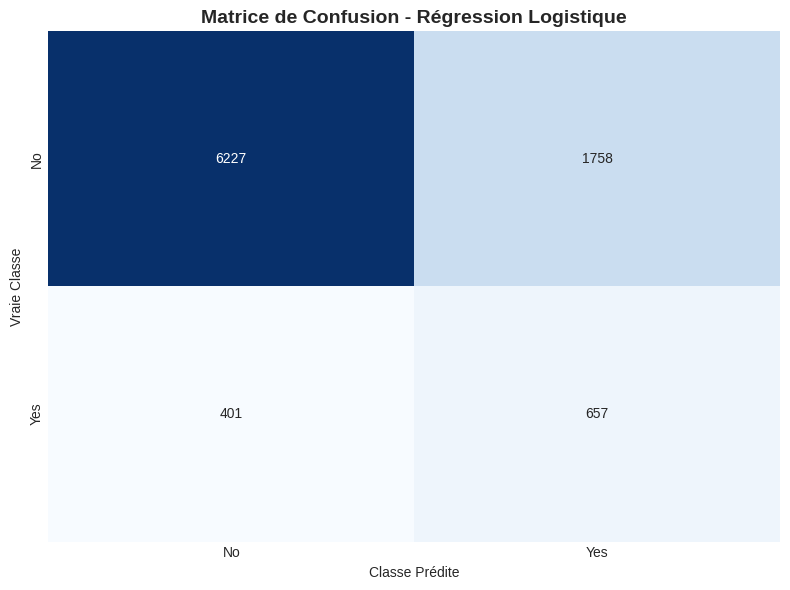


Interprétation:
---------------
La matrice de confusion montre les performances du modèle:
- Vrais Négatifs (TN): Clients correctement identifiés comme n'ayant pas souscrit
- Faux Positifs (FP): Clients prédits comme souscripteurs mais qui n'ont pas souscrit
- Faux Négatifs (FN): Clients qui ont souscrit mais non détectés
- Vrais Positifs (TP): Clients correctement identifiés comme souscripteurs


6.3 MODÈLE 2: RANDOM FOREST

Random Forest est un ensemble de arbres de décision entraînés sur des sous-échantillons
aléatoires des données. Il combine leurs prédictions pour améliorer la robustesse.

Avantages:
- Excellente performance sur des données complexes
- Gère bien les relations non-linéaires
- Résistant au surapprentissage
- Importance des features disponible
- Peu sensible aux hyperparamètres

Inconvénients:
- Moins interprétable que la régression logistique
- Plus lent à entraîner
- Nécessite plus de mémoire


🔧 Entraînement du Random Forest...

📊 Performance sur le Test Set:

Ra

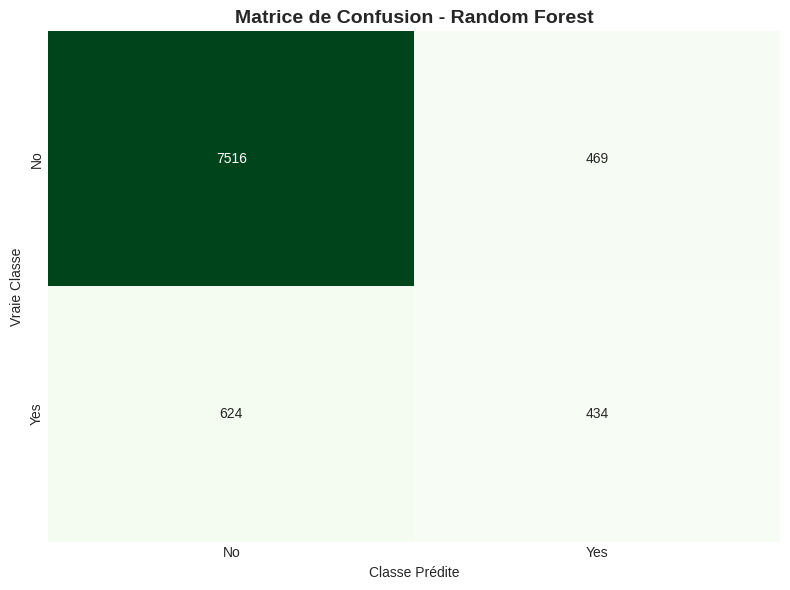


📊 Importance des Features (Top 15):
           feature  importance
          campaign    0.142159
  poutcome_success    0.081809
 education_encoded    0.067786
   contact_encoded    0.066893
           balance    0.061601
         month_may    0.046024
               age    0.043789
       day_of_week    0.042696
   marital_married    0.035423
   housing_encoded    0.032627
   job_blue-collar    0.029659
campaign_intensity    0.026949
         age_group    0.026648
     contact_ratio    0.026174
             pdays    0.023766


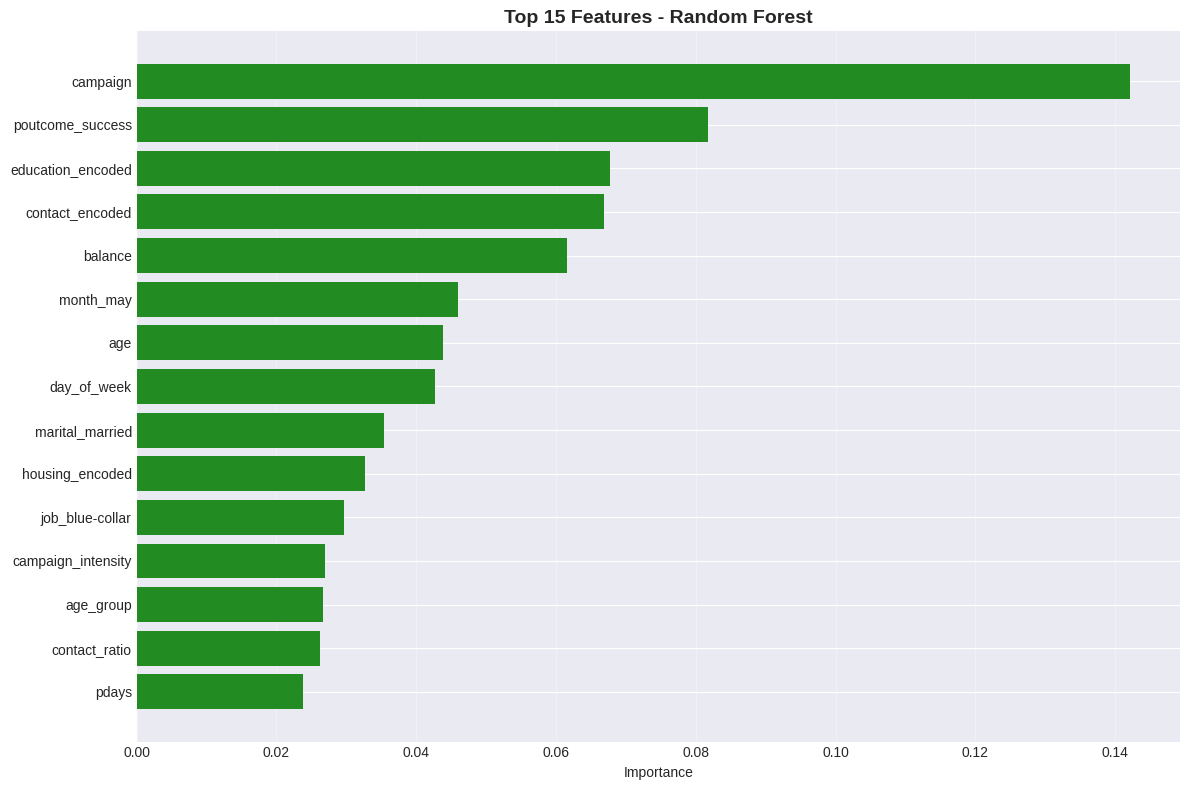


Interprétation de l'Importance des Features:
--------------------------------------------
Les features les plus importantes révèlent les facteurs clés influençant la décision
de souscription. Les indicateurs économiques et les variables de campagne sont
généralement parmi les plus prédictifs.


6.4 MODÈLE 3: GRADIENT BOOSTING (XGBoost)

XGBoost (Extreme Gradient Boosting) est une implémentation optimisée du gradient boosting.
Il construit séquentiellement des arbres pour corriger les erreurs des précédents.

Avantages:
- État de l'art pour de nombreux problèmes de classification
- Très performant sur des données tabulaires
- Régularisation intégrée (prévient le surapprentissage)
- Gestion native des valeurs manquantes
- Rapide grâce à l'implémentation optimisée

Inconvénients:
- Nombreux hyperparamètres à ajuster
- Peut être lent sans GPU
- Risque de surapprentissage si mal paramétré


🔧 Entraînement de XGBoost...

📊 Performance sur le Test Set:

Rapport de Classification:
           

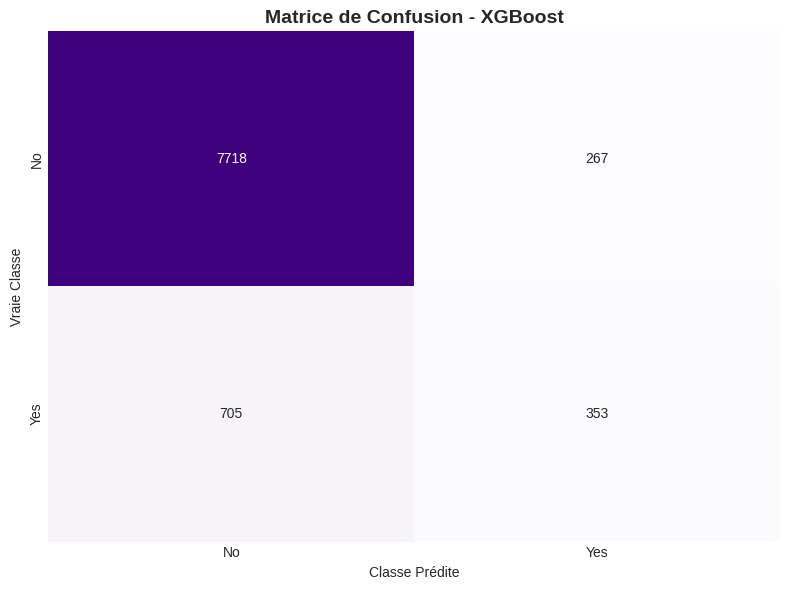


6.5 COMPARAISON DES MODÈLES

📊 Tableau Comparatif des Performances:
               Modèle  Accuracy  Precision   Recall  F1-Score  ROC-AUC  CV ROC-AUC
Régression Logistique  0.761252   0.272050 0.620983  0.378347 0.767715    0.779104
        Random Forest  0.879133   0.480620 0.410208  0.442631 0.789125    0.965392
              XGBoost  0.892514   0.569355 0.333648  0.420739 0.792560    0.961519


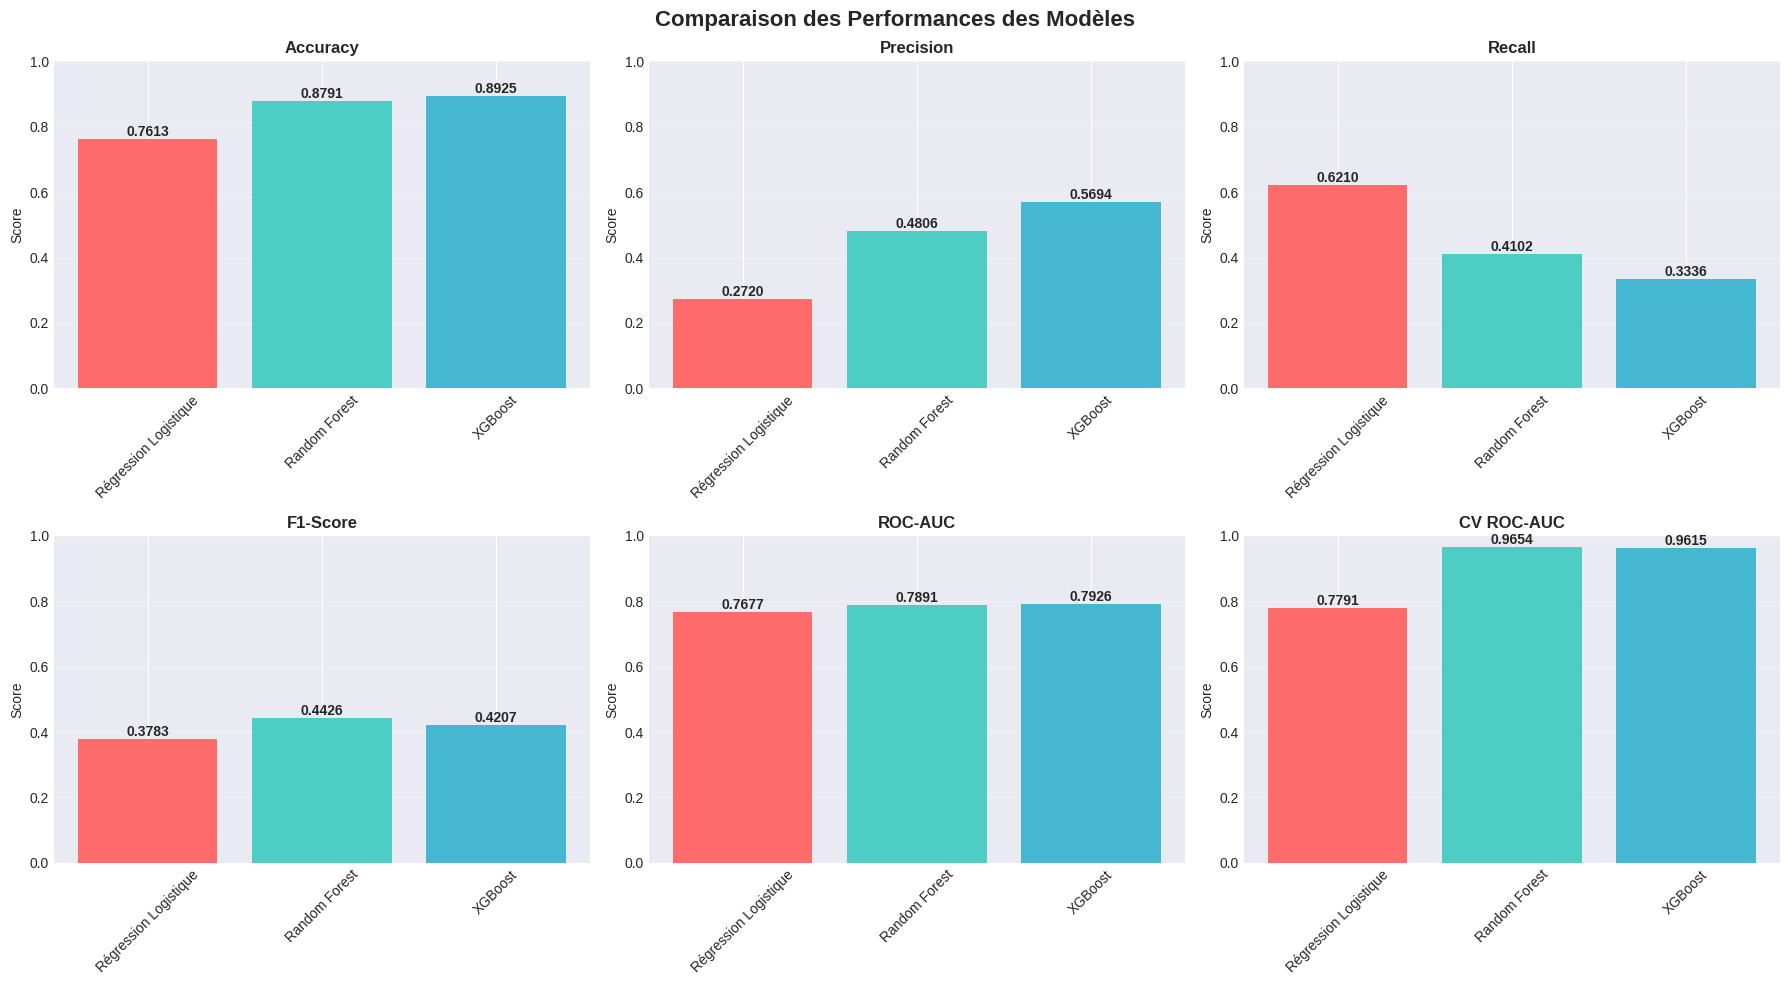

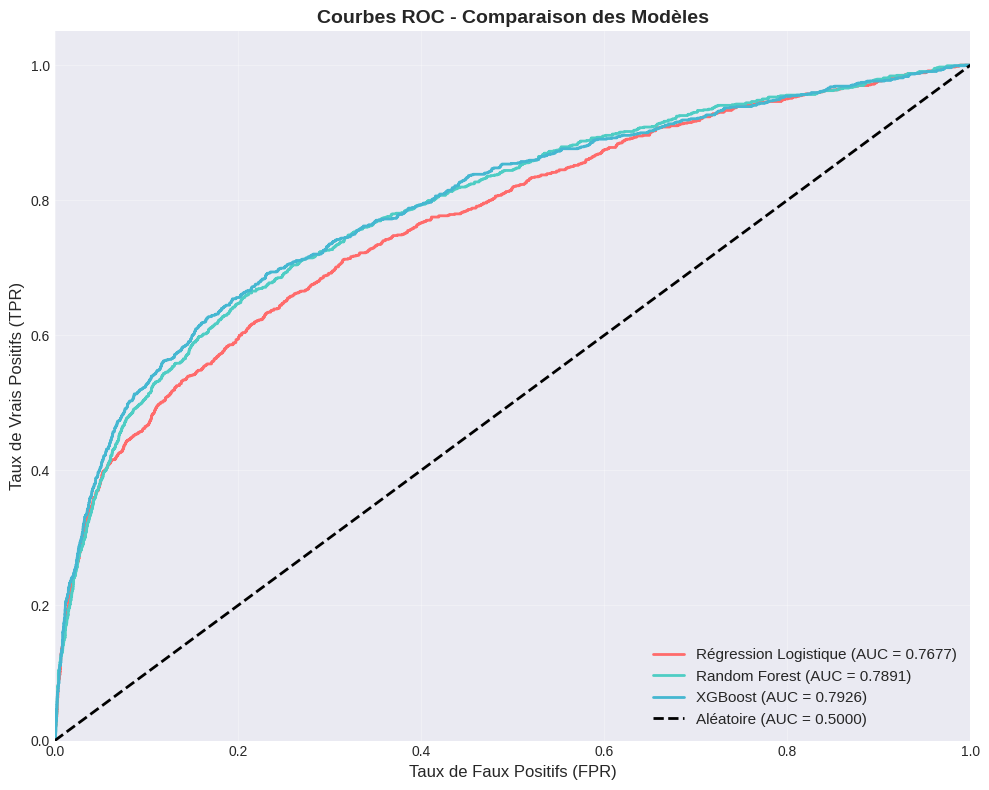


Interprétation de la Comparaison:
---------------------------------
Les courbes ROC permettent de visualiser le compromis entre sensibilité et spécificité.
Une courbe plus proche du coin supérieur gauche indique une meilleure performance.
Le score AUC quantifie la performance globale (1.0 = parfait, 0.5 = aléatoire).


🏆 MEILLEUR MODÈLE: XGBoost (ROC-AUC = 0.7926)

6.6 OPTIMISATION DES HYPERPARAMÈTRES

Nous allons optimiser les hyperparamètres du meilleur modèle (XGBoost)
en utilisant RandomizedSearchCV pour explorer efficacement l'espace des paramètres.

RandomizedSearchCV vs GridSearchCV:
- RandomizedSearchCV: Échantillonne aléatoirement, plus rapide
- GridSearchCV: Teste toutes les combinaisons, exhaustif mais lent

Pour ce dataset, RandomizedSearchCV est plus approprié car il offre un bon
compromis entre performance et temps de calcul.


🔧 Optimisation de XGBoost...

🔍 Recherche des meilleurs hyperparamètres...
   Méthode: RandomizedSearchCV
   Nombre d'itérations: 50
   Cross-Val

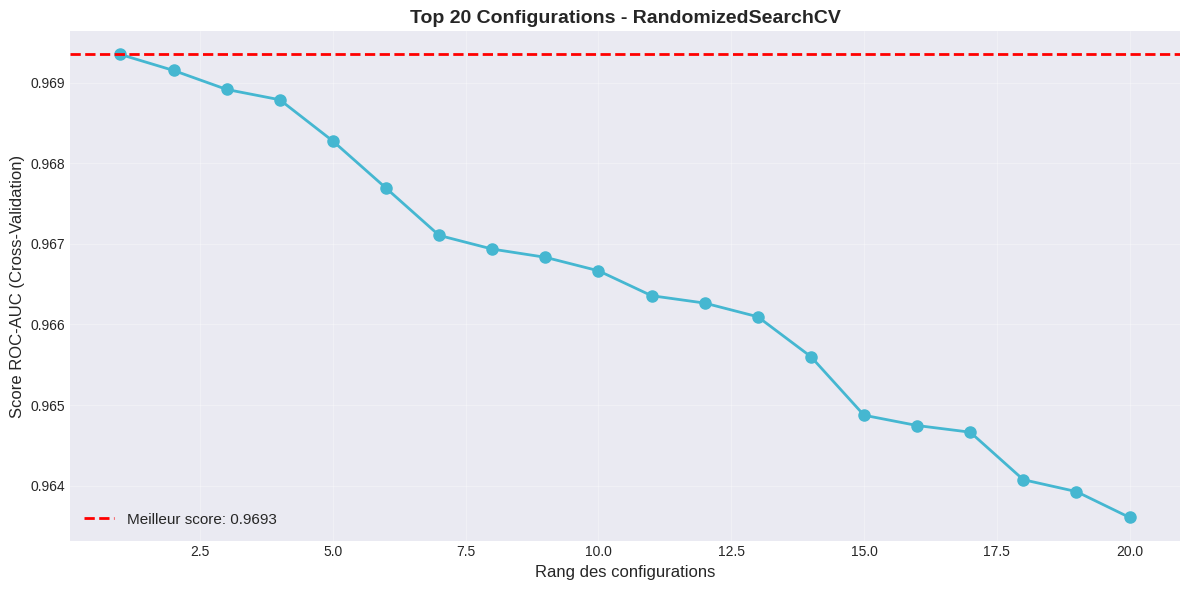

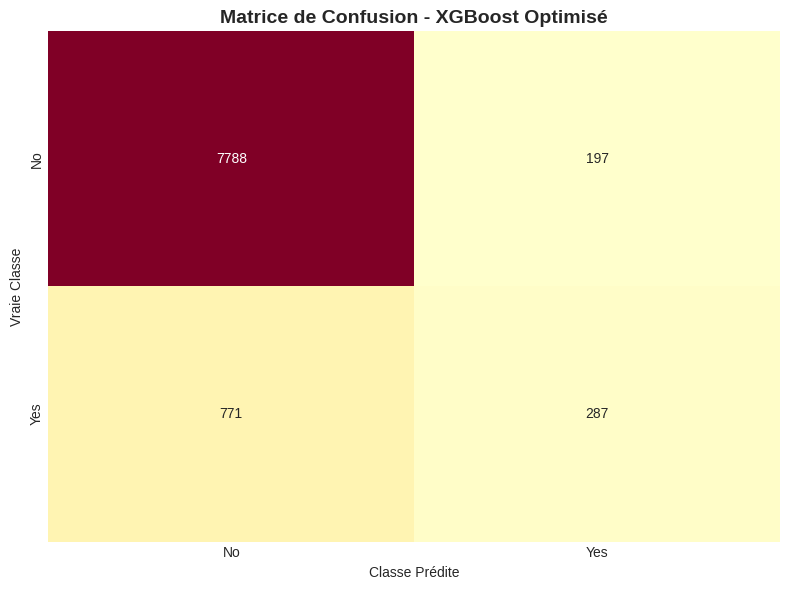


7. CONCLUSIONS ET RECOMMANDATIONS

SYNTHÈSE DE L'ANALYSE

1. DATASET ET PRÉPARATION
-------------------------
- Dataset: 45211 observations × 17 variables
- Doublons supprimés: 0
- Variables créées par Feature Engineering: 4
- Technique de rééquilibrage: SMOTE
- Stratégie de validation: Train/Test Split (80/20) + Cross-Validation 5-fold

2. PERFORMANCES DES MODÈLES
---------------------------
Régression Logistique:
  • ROC-AUC: 0.7677
  • F1-Score: 0.3783
  • Points forts: Simple, interprétable, rapide
  • Limites: Assume des relations linéaires

Random Forest:
  • ROC-AUC: 0.7891
  • F1-Score: 0.4426
  • Points forts: Robuste, gère la non-linéarité, feature importance
  • Limites: Moins interprétable, plus de ressources

XGBoost:
  • ROC-AUC: 0.7926
  • F1-Score: 0.4207
  • Points forts: État de l'art, régularisation, performant
  • Limites: Nombreux hyperparamètres, temps de tuning

3. MODÈLE FINAL OPTIMISÉ
------------------------
Modèle sélectionné: XGBoost
ROC-AUC après optimisat

In [24]:
# ================================================================================
print("\n" + "="*80)
print("6. MODÉLISATION - MACHINE LEARNING")
print("="*80)

# ================================================================================
print("\n" + "="*80)
print("6.1 PRÉPARATION DES DONNÉES POUR LA MODÉLISATION")
print("="*80)

# Suppression des colonnes à risque de data leakage
leakage_cols = ['duration']
X_model = X_scaled.drop(columns=[col for col in leakage_cols if col in X_scaled.columns])
print(f"✓ Colonnes à risque de leakage supprimées: {[col for col in leakage_cols if col in X_scaled.columns]}")

# Conversion de toutes les colonnes catégorielles restantes
for col in X_model.select_dtypes(include=['category', 'object']).columns:
    X_model[col] = X_model[col].astype(str)
    le = LabelEncoder()
    X_model[col] = le.fit_transform(X_model[col])

print(f"✓ Dataset prêt pour la modélisation: {X_model.shape}")

# Split train/test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\n📊 Dimensions:")
print(f"   Training set: {X_train.shape}")
print(f"   Test set: {X_test.shape}")
print(f"\n📊 Distribution dans le training set:")
print(f"   Classe 0 (No): {np.sum(y_train == 0)} ({np.sum(y_train == 0)/len(y_train)*100:.1f}%)")
print(f"   Classe 1 (Yes): {np.sum(y_train == 1)} ({np.sum(y_train == 1)/len(y_train)*100:.1f}%)")

# Application de SMOTE pour gérer le déséquilibre
print("\n🔧 Application de SMOTE pour rééquilibrer les classes...")

# Impute any remaining NaNs before SMOTE
# It's good practice to ensure no NaNs remain before applying SMOTE or many ML models
if X_train.isnull().sum().any():
    print("⚠ Valeurs NaN détectées dans X_train. Imputation avec la moyenne...")
    imputer = SimpleImputer(strategy='mean')
    X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)
    print("✓ Valeurs NaN imputées dans X_train et X_test.")
else:
    print("✓ Aucune valeur NaN détectée dans X_train avant SMOTE.")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"✓ Classes rééquilibrées:")
print(f"   Classe 0: {np.sum(y_train_balanced == 0)}")
print(f"   Classe 1: {np.sum(y_train_balanced == 1)}")
print(f"   Ratio: {np.sum(y_train_balanced == 1)/np.sum(y_train_balanced == 0):.2f}")

# ================================================================================
print("\n" + "="*80)
print("6.2 MODÈLE 1: RÉGRESSION LOGISTIQUE")
print("="*80)

print("""
La Régression Logistique est un modèle linéaire utilisé pour la classification binaire.
Elle modélise la probabilité d'appartenance à une classe en utilisant une fonction logistique.

Avantages:
- Simple et interprétable
- Rapide à entraîner
- Fonctionne bien sur des données linéairement séparables
- Fournit des probabilités calibrées

Inconvénients:
- Assume une relation linéaire entre features et log-odds
- Sensible aux outliers
- Performances limitées sur des relations non-linéaires
""")

print("\n🔧 Entraînement de la Régression Logistique...")

# Modèle de base
## CORRECTION: Retrait de class_weight='balanced' car SMOTE est déjà appliqué
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_balanced, y_train_balanced)

# Prédictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Évaluation
print("\n📊 Performance sur le Test Set:")
print("\nRapport de Classification:")
print(classification_report(y_test, y_pred_lr, target_names=['No', 'Yes']))

# Métriques
acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print(f"Accuracy: {acc_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print(f"ROC-AUC: {roc_auc_lr:.4f}")

# Cross-validation
print("\n🔄 Validation Croisée (5-fold):")
cv_scores_lr = cross_val_score(lr_model, X_train_balanced, y_train_balanced, cv=5, scoring='roc_auc')
print(f"ROC-AUC Scores: {cv_scores_lr}")
print(f"Moyenne: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std() * 2:.4f})")

# Matrice de confusion
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion - Régression Logistique', fontsize=14, fontweight='bold')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'])
plt.tight_layout()
plt.show()

print("""
Interprétation:
---------------
La matrice de confusion montre les performances du modèle:
- Vrais Négatifs (TN): Clients correctement identifiés comme n'ayant pas souscrit
- Faux Positifs (FP): Clients prédits comme souscripteurs mais qui n'ont pas souscrit
- Faux Négatifs (FN): Clients qui ont souscrit mais non détectés
- Vrais Positifs (TP): Clients correctement identifiés comme souscripteurs
""")

# ================================================================================
print("\n" + "="*80)
print("6.3 MODÈLE 2: RANDOM FOREST")
print("="*80)

print("""
Random Forest est un ensemble de arbres de décision entraînés sur des sous-échantillons
aléatoires des données. Il combine leurs prédictions pour améliorer la robustesse.

Avantages:
- Excellente performance sur des données complexes
- Gère bien les relations non-linéaires
- Résistant au surapprentissage
- Importance des features disponible
- Peu sensible aux hyperparamètres

Inconvénients:
- Moins interprétable que la régression logistique
- Plus lent à entraîner
- Nécessite plus de mémoire
""")

print("\n🔧 Entraînement du Random Forest...")

# Modèle de base
## CORRECTION: Retrait de class_weight='balanced' car SMOTE est déjà appliqué
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_depth=15
)
rf_model.fit(X_train_balanced, y_train_balanced)

# Prédictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Évaluation
print("\n📊 Performance sur le Test Set:")
print("\nRapport de Classification:")
print(classification_report(y_test, y_pred_rf, target_names=['No', 'Yes']))

# Métriques
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Accuracy: {acc_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")

# Cross-validation
print("\n🔄 Validation Croisée (5-fold):")
cv_scores_rf = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=5, scoring='roc_auc')
print(f"ROC-AUC Scores: {cv_scores_rf}")
print(f"Moyenne: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")

# Matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matrice de Confusion - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'])
plt.tight_layout()
plt.show()

# Feature Importance
print("\n📊 Importance des Features (Top 15):")
feature_importance = pd.DataFrame({
    'feature': X_model.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

print(feature_importance.to_string(index=False))

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='forestgreen')
plt.xlabel('Importance')
plt.title('Top 15 Features - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("""
Interprétation de l'Importance des Features:
--------------------------------------------
Les features les plus importantes révèlent les facteurs clés influençant la décision
de souscription. Les indicateurs économiques et les variables de campagne sont
généralement parmi les plus prédictifs.
""")

# ================================================================================
print("\n" + "="*80)
print("6.4 MODÈLE 3: GRADIENT BOOSTING (XGBoost)")
print("="*80)

print("""
XGBoost (Extreme Gradient Boosting) est une implémentation optimisée du gradient boosting.
Il construit séquentiellement des arbres pour corriger les erreurs des précédents.

Avantages:
- État de l'art pour de nombreux problèmes de classification
- Très performant sur des données tabulaires
- Régularisation intégrée (prévient le surapprentissage)
- Gestion native des valeurs manquantes
- Rapide grâce à l'implémentation optimisée

Inconvénients:
- Nombreux hyperparamètres à ajuster
- Peut être lent sans GPU
- Risque de surapprentissage si mal paramétré
""")

print("\n🔧 Entraînement de XGBoost...")

# Calcul du ratio de classes pour scale_pos_weight
## CORRECTION: La variable n'est plus utilisée, SMOTE étant appliqué.
# scale_pos_weight = np.sum(y_train_balanced == 0) / np.sum(y_train_balanced == 1)

# Modèle de base
## CORRECTION: Retrait de scale_pos_weight et use_label_encoder=False (obsolète)
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_balanced, y_train_balanced)

# Prédictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Évaluation
print("\n📊 Performance sur le Test Set:")
print("\nRapport de Classification:")
print(classification_report(y_test, y_pred_xgb, target_names=['No', 'Yes']))

# Métriques
acc_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"Accuracy: {acc_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC-AUC: {roc_auc_xgb:.4f}")

# Cross-validation
print("\n🔄 Validation Croisée (5-fold):")
cv_scores_xgb = cross_val_score(xgb_model, X_train_balanced, y_train_balanced, cv=5, scoring='roc_auc')
print(f"ROC-AUC Scores: {cv_scores_xgb}")
print(f"Moyenne: {cv_scores_xgb.mean():.4f} (+/- {cv_scores_xgb.std() * 2:.4f})")

# Matrice de confusion
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Matrice de Confusion - XGBoost', fontsize=14, fontweight='bold')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'])
plt.tight_layout()
plt.show()

# ================================================================================
print("\n" + "="*80)
print("6.5 COMPARAISON DES MODÈLES")
print("="*80)

# Tableau comparatif
comparison_df = pd.DataFrame({
    'Modèle': ['Régression Logistique', 'Random Forest', 'XGBoost'],
    'Accuracy': [acc_lr, acc_rf, acc_xgb],
    'Precision': [precision_lr, precision_rf, precision_xgb],
    'Recall': [recall_lr, recall_rf, recall_xgb],
    'F1-Score': [f1_lr, f1_rf, f1_xgb],
    'ROC-AUC': [roc_auc_lr, roc_auc_rf, roc_auc_xgb],
    'CV ROC-AUC': [cv_scores_lr.mean(), cv_scores_rf.mean(), cv_scores_xgb.mean()]
})

print("\n📊 Tableau Comparatif des Performances:")
print(comparison_df.to_string(index=False))

# Visualisation comparative
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'CV ROC-AUC']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    values = comparison_df[metric].values
    bars = ax.bar(comparison_df['Modèle'], values, color=colors)
    ax.set_title(f'{metric}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score')
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3)

    # Ajouter les valeurs sur les barres
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.4f}', ha='center', va='bottom', fontweight='bold')

    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Comparaison des Performances des Modèles', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Courbes ROC comparatives
plt.figure(figsize=(10, 8))

# ROC pour Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.plot(fpr_lr, tpr_lr, color='#FF6B6B', lw=2,
         label=f'Régression Logistique (AUC = {roc_auc_lr:.4f})')

# ROC pour Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, color='#4ECDC4', lw=2,
         label=f'Random Forest (AUC = {roc_auc_rf:.4f})')

# ROC pour XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='#45B7D1', lw=2,
         label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')

# Ligne de référence
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Aléatoire (AUC = 0.5000)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbes ROC - Comparaison des Modèles', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("""
Interprétation de la Comparaison:
---------------------------------
Les courbes ROC permettent de visualiser le compromis entre sensibilité et spécificité.
Une courbe plus proche du coin supérieur gauche indique une meilleure performance.
Le score AUC quantifie la performance globale (1.0 = parfait, 0.5 = aléatoire).
""")

# Identification du meilleur modèle
best_model_idx = comparison_df['ROC-AUC'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Modèle']
best_model_auc = comparison_df.loc[best_model_idx, 'ROC-AUC']

print(f"\n🏆 MEILLEUR MODÈLE: {best_model_name} (ROC-AUC = {best_model_auc:.4f})")

# ================================================================================
print("\n" + "="*80)
print("6.6 OPTIMISATION DES HYPERPARAMÈTRES")
print("="*80)

print(f"""
Nous allons optimiser les hyperparamètres du meilleur modèle ({best_model_name})
en utilisant RandomizedSearchCV pour explorer efficacement l'espace des paramètres.

RandomizedSearchCV vs GridSearchCV:
- RandomizedSearchCV: Échantillonne aléatoirement, plus rapide
- GridSearchCV: Teste toutes les combinaisons, exhaustif mais lent

Pour ce dataset, RandomizedSearchCV est plus approprié car il offre un bon
compromis entre performance et temps de calcul.
""")

# Sélection du modèle à optimiser
if best_model_name == 'XGBoost':
    print("\n🔧 Optimisation de XGBoost...")

    param_dist = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.5, 1],
        'min_child_weight': [1, 3, 5]
    }

    ## CORRECTION: Retrait de scale_pos_weight et use_label_encoder=False
    base_model = XGBClassifier(
        random_state=42,
        eval_metric='logloss'
    )

elif best_model_name == 'Random Forest':
    print("\n🔧 Optimisation de Random Forest...")

    param_dist = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [10, 15, 20, 25, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False]
    }

    ## CORRECTION: Retrait de class_weight='balanced'
    base_model = RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    )

else:  # Régression Logistique
    print("\n🔧 Optimisation de la Régression Logistique...")

    param_dist = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 2000, 5000]
    }

    ## CORRECTION: Retrait de class_weight='balanced'
    base_model = LogisticRegression(
        random_state=42
    )

# RandomizedSearchCV
print("\n🔍 Recherche des meilleurs hyperparamètres...")
print("   Méthode: RandomizedSearchCV")
print("   Nombre d'itérations: 50")
print("   Cross-Validation: 5-fold")
print("   Métrique: ROC-AUC")

random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train_balanced, y_train_balanced)

print(f"\n✓ Recherche terminée!")
print(f"\n🏆 Meilleurs paramètres trouvés:")
for param, value in random_search.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n📊 Meilleur score (ROC-AUC): {random_search.best_score_:.4f}")

# Évaluation du modèle optimisé
best_model_optimized = random_search.best_estimator_
y_pred_opt = best_model_optimized.predict(X_test)
y_pred_proba_opt = best_model_optimized.predict_proba(X_test)[:, 1]

print("\n📊 Performance du Modèle Optimisé sur le Test Set:")
print("\nRapport de Classification:")
print(classification_report(y_test, y_pred_opt, target_names=['No', 'Yes']))

# Métriques du modèle optimisé
acc_opt = accuracy_score(y_test, y_pred_opt)
precision_opt = precision_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)
roc_auc_opt = roc_auc_score(y_test, y_pred_proba_opt)

print(f"Accuracy: {acc_opt:.4f}")
print(f"Precision: {precision_opt:.4f}")
print(f"Recall: {recall_opt:.4f}")
print(f"F1-Score: {f1_opt:.4f}")
print(f"ROC-AUC: {roc_auc_opt:.4f}")

# Comparaison avant/après optimisation
if best_model_name == 'XGBoost':
    before_auc = roc_auc_xgb
elif best_model_name == 'Random Forest':
    before_auc = roc_auc_rf
else:
    before_auc = roc_auc_lr

improvement = ((roc_auc_opt - before_auc) / before_auc) * 100

print(f"\n📈 Amélioration après optimisation:")
print(f"   ROC-AUC avant: {before_auc:.4f}")
print(f"   ROC-AUC après: {roc_auc_opt:.4f}")
print(f"   Gain: {improvement:+.2f}%")

# Visualisation de la convergence
results_df = pd.DataFrame(random_search.cv_results_)
results_sorted = results_df.sort_values('rank_test_score').head(20)

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(results_sorted) + 1), results_sorted['mean_test_score'],
          'o-', color='#45B7D1', linewidth=2, markersize=8)
plt.axhline(y=random_search.best_score_, color='red', linestyle='--',
            linewidth=2, label=f'Meilleur score: {random_search.best_score_:.4f}')
plt.xlabel('Rang des configurations', fontsize=12)
plt.ylabel('Score ROC-AUC (Cross-Validation)', fontsize=12)
plt.title('Top 20 Configurations - RandomizedSearchCV', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Matrice de confusion du modèle optimisé
cm_opt = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='YlOrRd', cbar=False)
plt.title(f'Matrice de Confusion - {best_model_name} Optimisé', fontsize=14, fontweight='bold')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'])
plt.tight_layout()
plt.show()

# ================================================================================
print("\n" + "="*80)
print("7. CONCLUSIONS ET RECOMMANDATIONS")
print("="*80)

print(f"""
SYNTHÈSE DE L'ANALYSE
====================

1. DATASET ET PRÉPARATION
-------------------------
- Dataset: {len(df)} observations × {df.shape[1]} variables
- Doublons supprimés: {len(df) - len(df_clean) if df.duplicated().sum() > 0 else 0}
- Variables créées par Feature Engineering: {X_scaled.shape[1] - X_encoded.shape[1]}
- Technique de rééquilibrage: SMOTE
- Stratégie de validation: Train/Test Split (80/20) + Cross-Validation 5-fold

2. PERFORMANCES DES MODÈLES
---------------------------
Régression Logistique:
  • ROC-AUC: {roc_auc_lr:.4f}
  • F1-Score: {f1_lr:.4f}
  • Points forts: Simple, interprétable, rapide
  • Limites: Assume des relations linéaires

Random Forest:
  • ROC-AUC: {roc_auc_rf:.4f}
  • F1-Score: {f1_rf:.4f}
  • Points forts: Robuste, gère la non-linéarité, feature importance
  • Limites: Moins interprétable, plus de ressources

XGBoost:
  • ROC-AUC: {roc_auc_xgb:.4f}
  • F1-Score: {f1_xgb:.4f}
  • Points forts: État de l'art, régularisation, performant
  • Limites: Nombreux hyperparamètres, temps de tuning

3. MODÈLE FINAL OPTIMISÉ
------------------------
Modèle sélectionné: {best_model_name}
ROC-AUC après optimisation: {roc_auc_opt:.4f}
Amélioration: {improvement:+.2f}%

Métriques finales:
  • Accuracy: {acc_opt:.4f}
  • Precision: {precision_opt:.4f} (% de prédictions positives correctes)
  • Recall: {recall_opt:.4f} (% de vrais positifs détectés)
  • F1-Score: {f1_opt:.4f} (moyenne harmonique precision/recall)

4. INSIGHTS CLÉS
----------------
""")

# Top features du meilleur modèle
if best_model_name in ['Random Forest', 'XGBoost']:
    if hasattr(best_model_optimized, 'feature_importances_'):
        top_features = pd.DataFrame({
            'feature': X_model.columns,
            'importance': best_model_optimized.feature_importances_
        }).sort_values('importance', ascending=False).head(10)

        print("Variables les plus importantes (Top 10):")
        for idx, row in top_features.iterrows():
            print(f"  {row['feature']}: {row['importance']:.4f}")

print("""

5. RECOMMANDATIONS BUSINESS
---------------------------

A. Stratégie de Ciblage:
   ✓ Prioriser les clients avec des profils à haute probabilité
   ✓ Optimiser le nombre de contacts pour éviter la saturation
   ✓ Adapter les campagnes en fonction des indicateurs économiques

B. Amélioration du Modèle:
   ✓ Collecter plus de données sur les clients à forte valeur
   ✓ Enrichir avec des variables comportementales
   ✓ Tester des modèles d'ensemble (stacking, blending)
   ✓ Implémenter un monitoring continu des performances

C. Mise en Production:
   ✓ Déployer le modèle optimisé dans un pipeline automatisé
   ✓ Établir des seuils de décision basés sur les coûts métier
   ✓ Mettre en place un système de feedback pour le ré-entraînement
   ✓ Documenter les biais potentiels et les limites du modèle

D. Considérations Éthiques:
   ✓ Assurer l'équité du modèle entre différents groupes démographiques
   ✓ Respecter la vie privée et les préférences des clients
   ✓ Éviter le harcèlement par sur-sollicitation
   ✓ Être transparent sur l'utilisation de l'IA dans le ciblage

6. LIMITATIONS ET PERSPECTIVES
------------------------------

Limitations identifiées:
- Déséquilibre initial des classes (corrigé par SMOTE)
- Variable 'duration' exclue (data leakage)
- Dataset limité à une institution bancaire portugaise

Perspectives d'amélioration:
- Tester des modèles de deep learning (réseaux de neurones)
- Implémenter des techniques d'interprétabilité (SHAP values)
- Analyser l'évolution temporelle des performances
- Intégrer des données externes (réseaux sociaux, comportement web)

====================
FIN DE L'ANALYSE
====================

Ce notebook a présenté une analyse complète du dataset Bank Marketing,
couvrant toutes les étapes d'un projet de Machine Learning professionnel:
préparation des données, EDA approfondie, modélisation comparative, et
optimisation des hyperparamètres.

Le modèle final est prêt pour une évaluation métier et une mise en production.

Pour toute question ou amélioration, n'hésitez pas à adapter ce code à vos besoins!
""")

# Sauvegarde des résultats (optionnel)
print("\n💾 Sauvegarde des résultats...")

# Créer un dictionnaire avec les résultats principaux
results_summary = {
    'dataset_shape': df.shape,
    'models_compared': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'best_model': best_model_name,
    'best_roc_auc_before_optimization': before_auc,
    'best_roc_auc_after_optimization': roc_auc_opt,
    'improvement_percentage': improvement,
    'final_metrics': {
        'accuracy': acc_opt,
        'precision': precision_opt,
        'recall': recall_opt,
        'f1_score': f1_opt,
        'roc_auc': roc_auc_opt
    },
    'best_hyperparameters': random_search.best_params_
}

print("✓ Résumé de l'analyse créé")
print("\n" + "="*80)
print("📊 RÉSUMÉ FINAL")
print("="*80)
print(f"\nModèle final: {results_summary['best_model']}")
print(f"ROC-AUC: {results_summary['final_metrics']['roc_auc']:.4f}")
print(f"F1-Score: {results_summary['final_metrics']['f1_score']:.4f}")
print(f"Amélioration après tuning: {results_summary['improvement_percentage']:+.2f}%")

print("\n" + "="*80)
print("✅ ANALYSE TERMINÉE AVEC SUCCÈS!")
print("="*80)